<a href="https://colab.research.google.com/github/123nol/cat_dog_classifier/blob/main/Copy_of_fcc_cat_dog_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_do

In [ ]:
# 3
train_image_generator = ImageDataGenerator(
    rescale=1./255
)
validation_image_generator = ImageDataGenerator(
    rescale=1./255
)
test_image_generator = ImageDataGenerator(
    rescale=1./255
)

train_data_gen = train_image_generator.flow_from_directory(train_dir,batch_size=batch_size,shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode="binary",classes=["cats","dogs"])
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,batch_size=batch_size,shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),classes=["cats","dogs"],class_mode="binary")
test_data_gen = test_image_generator.flow_from_directory(test_dir,shuffle=False,target_size=(IMG_HEIGHT,IMG_WIDTH), classes=[""],class_mode=None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


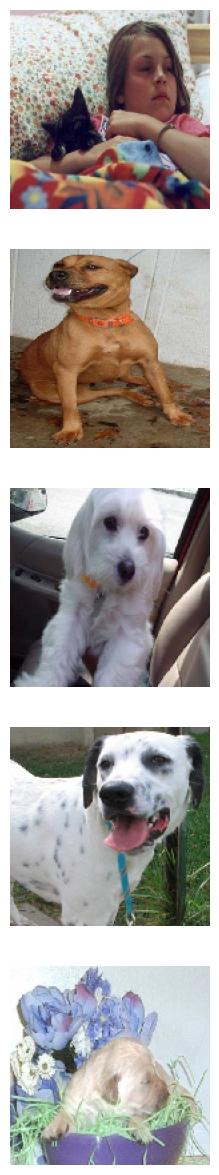

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,     # Random rotations up to 20 degrees
    width_shift_range=0.2, # Random horizontal shifts up to 20%
    height_shift_range=0.2,# Random vertical shifts up to 20%
    horizontal_flip=True,  # Random horizontal flips
    brightness_range=[0.8, 1.2]  # Random brightness adjustments

)



Found 2000 images belonging to 2 classes.


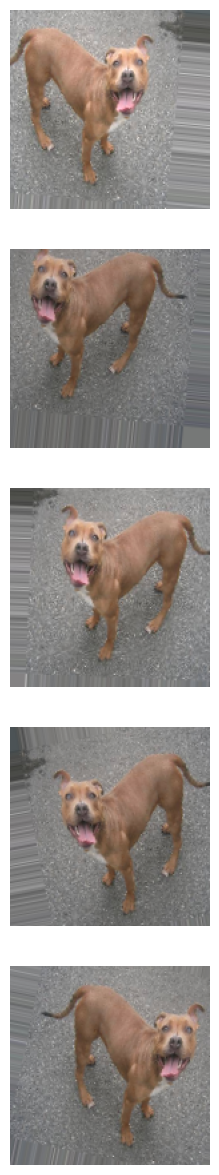

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential(
    [
        Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation="relu"),

        Flatten(),
        Dense(64,activation="relu"),
        Dropout(0.2),
        Dense(64,activation="relu"),
        Dropout(0.2),

        Dense(1,activation="sigmoid")
    ]




)
model.compile(optimizer="Adam",loss="binary_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │       4,735,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,795,585 (18.29 MB)

 Trainable params: 4,795,585 (18.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
history = model.fit(
    train_data_gen,
    epochs=25,
    validation_data=val_data_gen,
    steps_per_epoch=128,
    validation_steps=128

)

Epoch 1/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - accuracy: 0.5026 - loss: 0.7711 - val_accuracy: 0.5120 - val_loss: 0.6930
Epoch 2/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.4830 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.5670 - val_loss: 0.6918
Epoch 4/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.5092 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 5/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.5107 - loss: 0.6912 - val_accuracy: 0.5300 - val_loss: 0.6853
Epoch 6/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.5647 - loss: 0.6888 - val_accuracy: 0.5660 - val_loss: 0.6794
Epoch 7/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.5908 - loss: 0.6807 - val_accuracy: 0.6140 - val_loss: 0.6650
Epoch 8/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.5799 - loss: 0.6789 -

ValueError: x and y must have same first dimension, but have shapes (15,) and (25,)

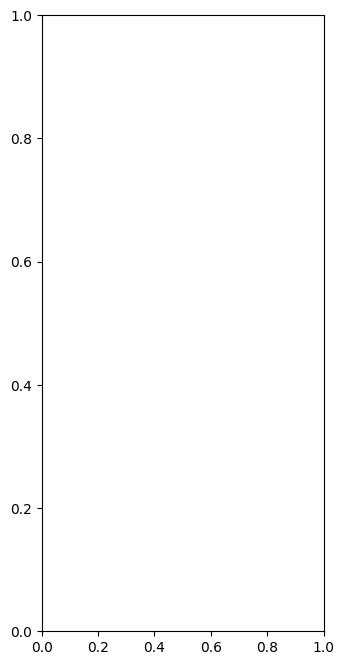

In [ ]:
# 9
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
pred=model.predict(
    test_data_gen
)
prob=np.array(pred).flatten()
probabilities=[1 if x>=0.5 else 0 for x in prob]



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
